In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
import matplotlib.patches as mpatches
import nibabel as nib
import scipy.io as sio
from nilearn import plotting, image
from nilearn.image.image import mean_img
from nilearn.plotting.img_plotting import plot_epi, plot_roi

###Set paths & variables:

In [95]:
path_root = '/notebooks/twins_movie/' 
path_out = ''
scrub = 'noscrub'
fir_norm = 'perc'
scale = 'sci10_scg8_scf8'
path_fir = '%sstability_fir_all_sad_blocs_%s_%s/'%(path_root,scrub,fir_norm)
num_clusters  =  int(scale[scale.find('scf')+3:]) # the number of clusters 
subtypes = 5+1 # 5 subtytes plus one part
clust_list = range(1,num_clusters+1)  # set the liste of  clusters
anat_template = '/home/yassinebha/database/white_template.nii.gz'
partition_vol = "%sstability_group/%s_nii/brain_partition_consensus_group_%s.nii.gz"%(path_fir,scale,scale)
network_select = range(1,num_clusters+1) # change this to select specific networks

###Set functions

In [96]:
def plot_partition(anat_template,partition_vol):
    """
    display anat tempplate overlayed by a partition map
    """ 
    ## Display partitions
    in_vol=nib.load(partition_vol)
    data=in_vol.get_data()
    num_clusters = np.max(data)
    display = plotting.plot_anat(anat_template,
                             colorbar=False,
                             title="Consensus Partition scale %i"%(num_clusters),
                             cut_coords=(0,0,0))

    display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)
    display = plotting.plot_anat(anat_template,
                                 colorbar=False,
                                 display_mode='z',
                                 cut_coords= range(-40, 60, 10) 
                                 )
    display.add_overlay(in_vol,cmap=cm.jet,alpha=0.4)

In [97]:
def plot_sub_partition(anat_template,partition_vol,network_select):
    """
    display anat tempplate overlayed by a 
    sub-partition maps for each network
    """ 
    in_vol=nib.load(partition_vol)
    data=in_vol.get_data()
    value=np.unique(data[data!=0]) 
    new_shape = data.shape + (np.max(value),)
    output= np.zeros(new_shape)
    for ind, val in enumerate(value):
        output[data==val,ind] = val
    out_image = nib.Nifti1Image(output, affine=in_vol.get_affine(), header=in_vol.get_header())
    
    for network_ind, network_val in enumerate(network_select):
        display = plotting.plot_anat(anat_template,
                             colorbar=False,
                             title="Network %i"%(network_select[network_ind]),
                             display_mode='z',
                             cut_coords= range(-50, 80, 20))
        display.add_overlay(image.index_img(out_image, network_val-1 ),cmap=cm.jet,alpha=0.4, vmin=1, vmax=num_clusters)

### Plot heritability estimate for each network and subtypes

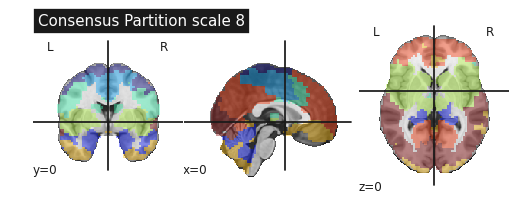

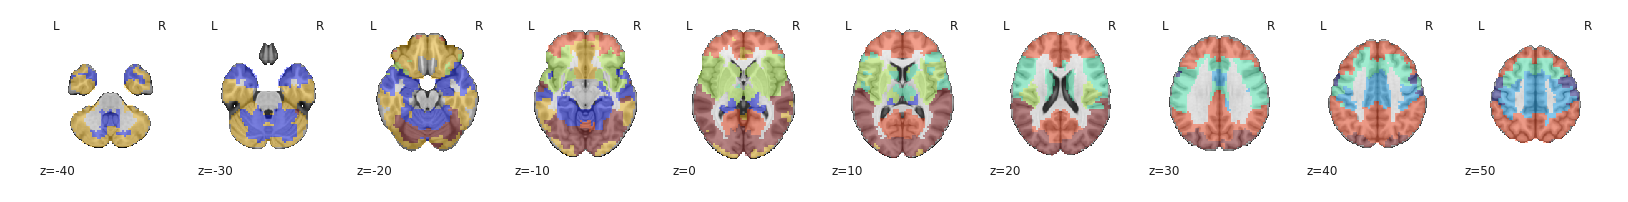

In [107]:
# View partition
plot_partition(anat_template,partition_vol)

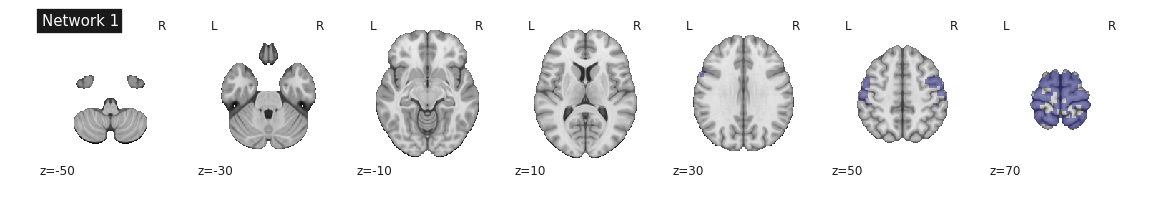

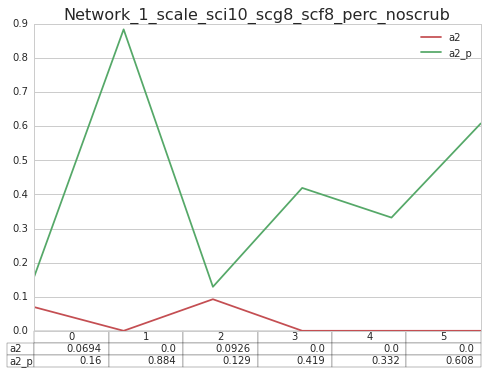

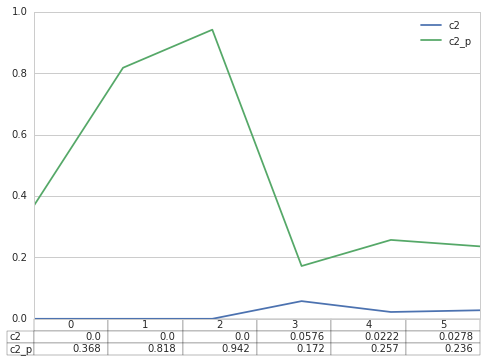

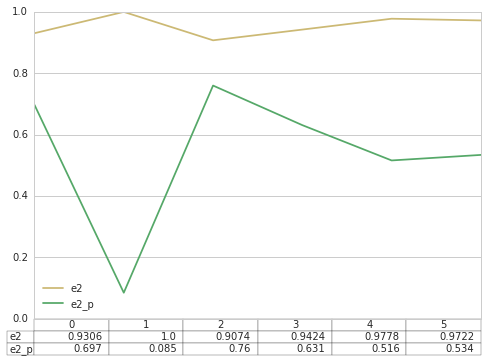

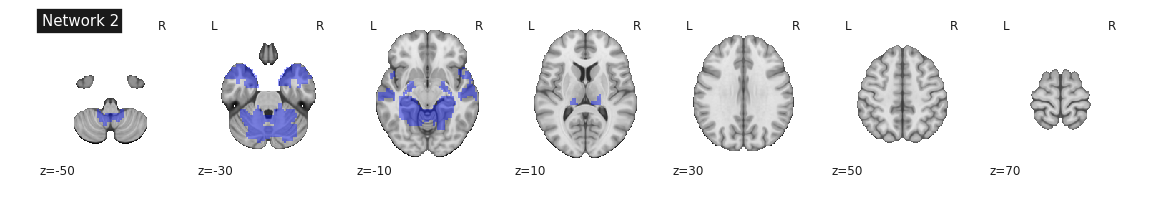

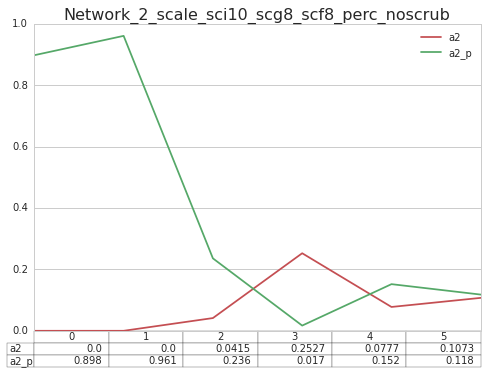

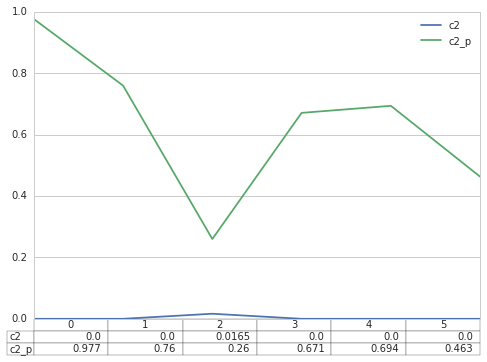

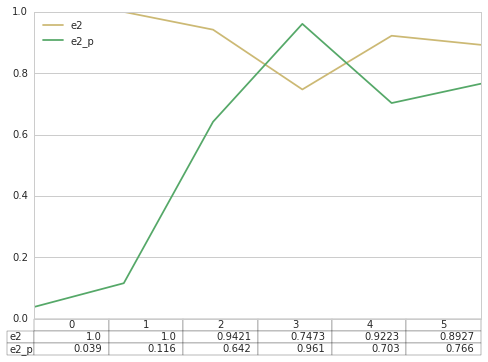

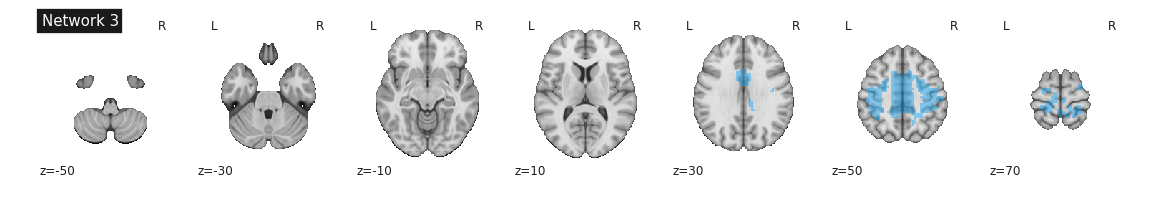

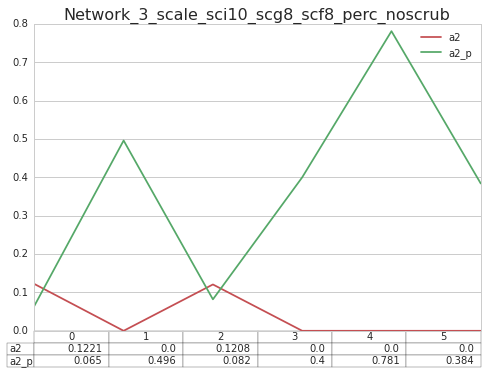

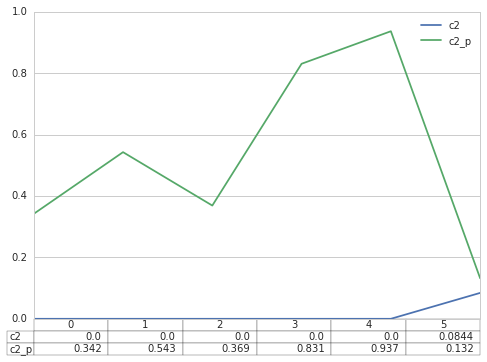

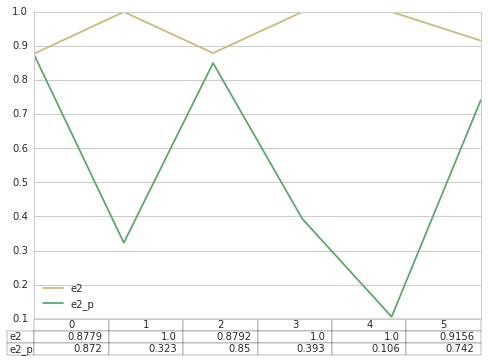

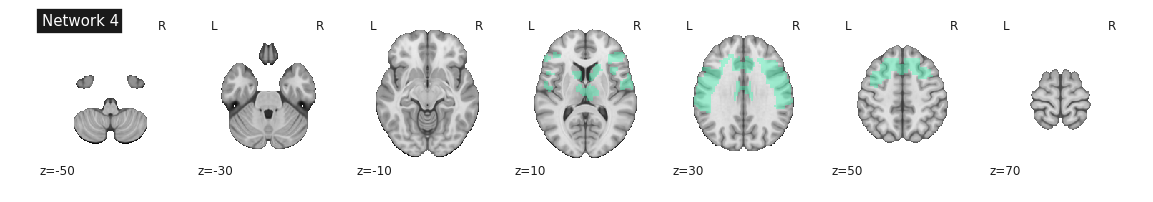

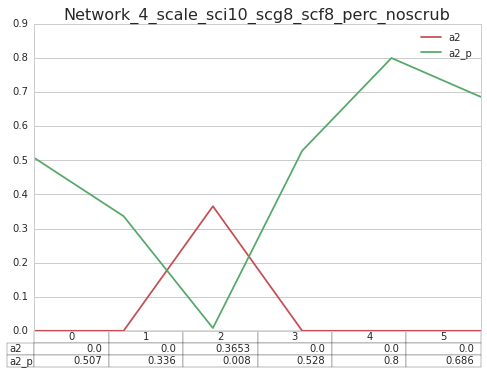

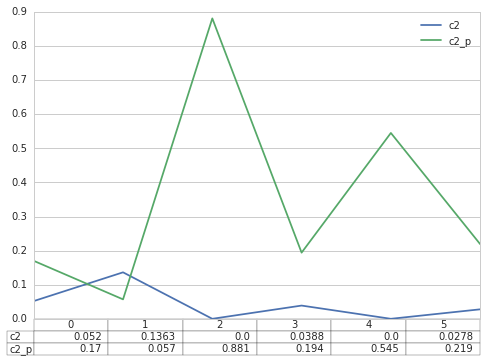

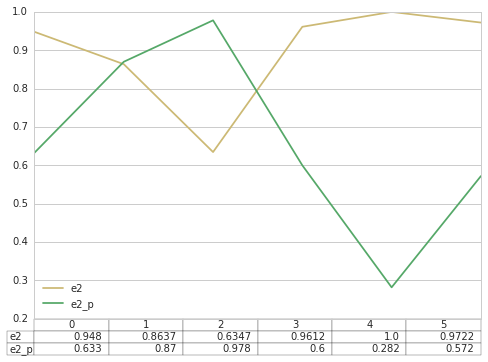

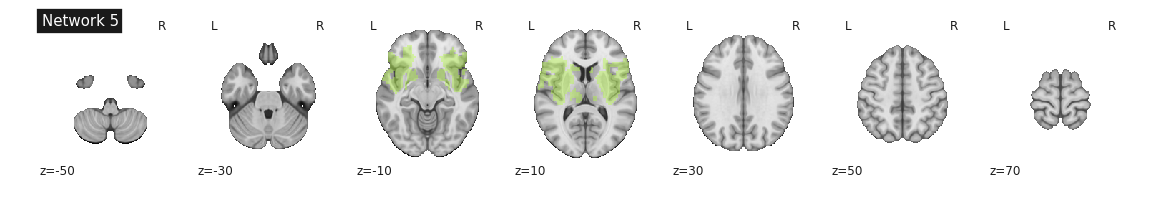

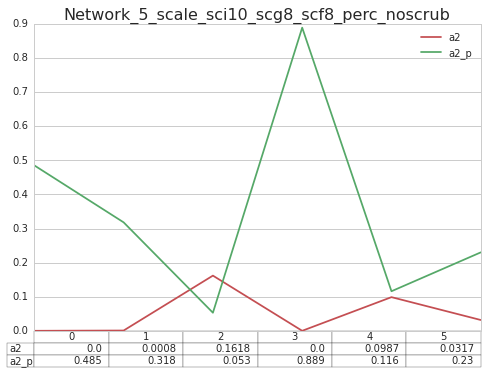

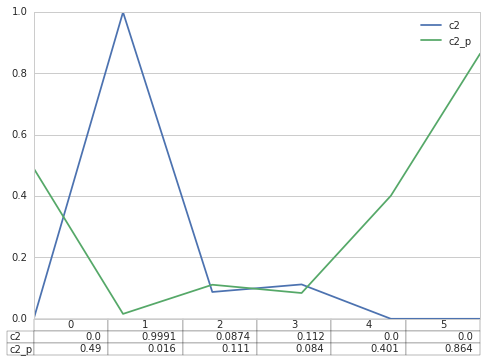

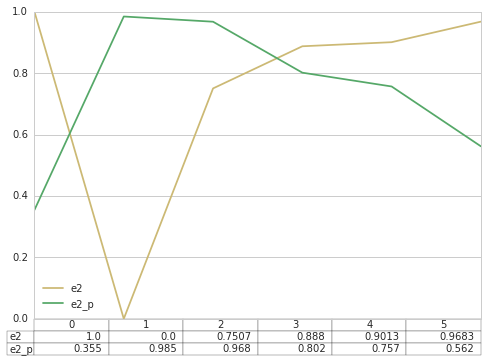

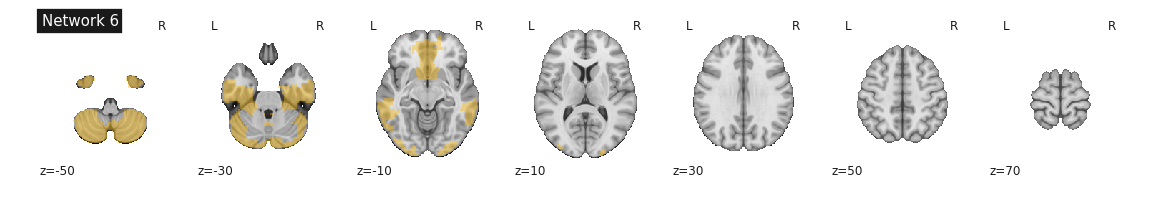

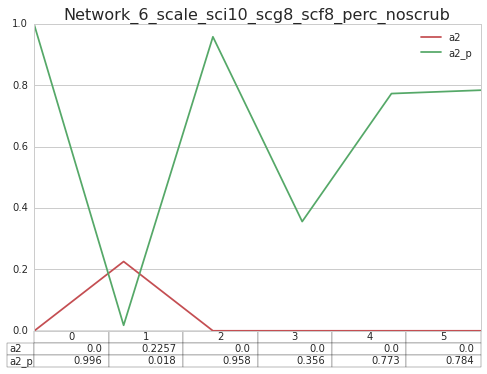

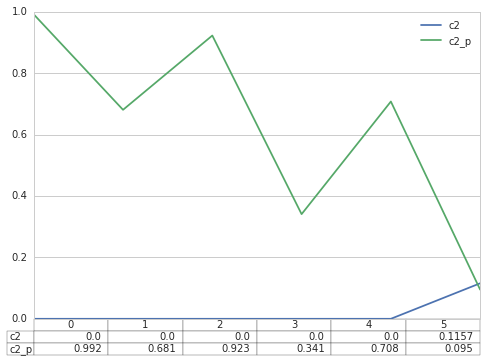

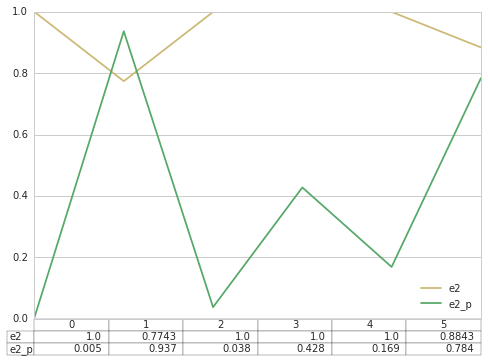

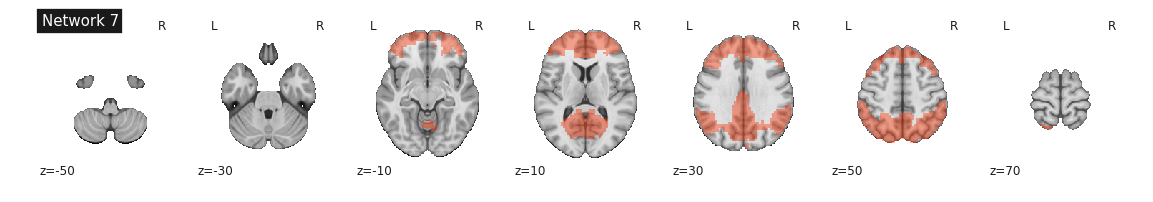

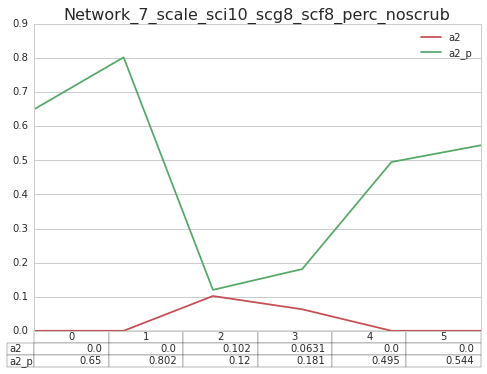

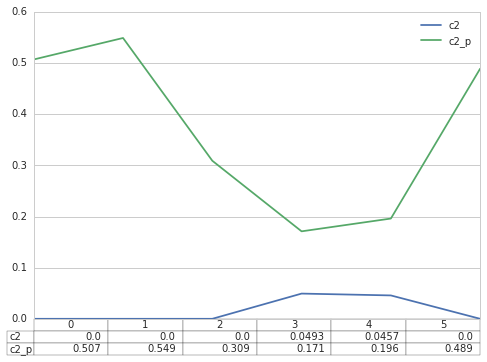

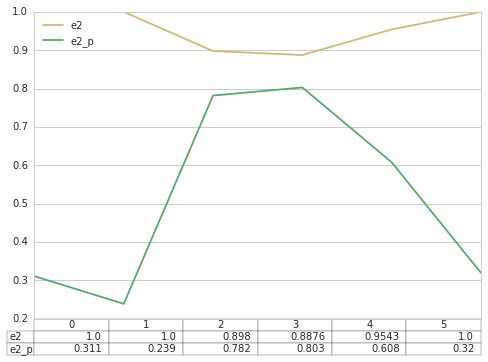

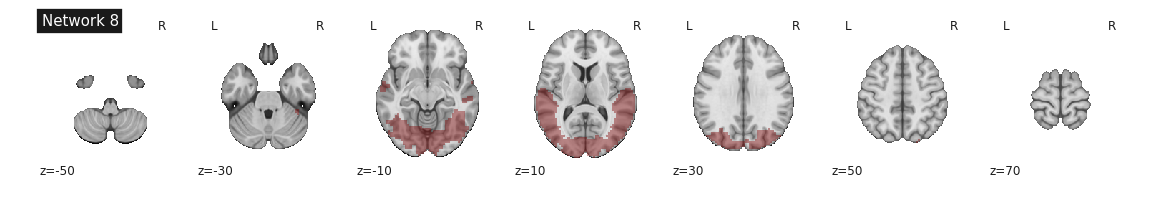

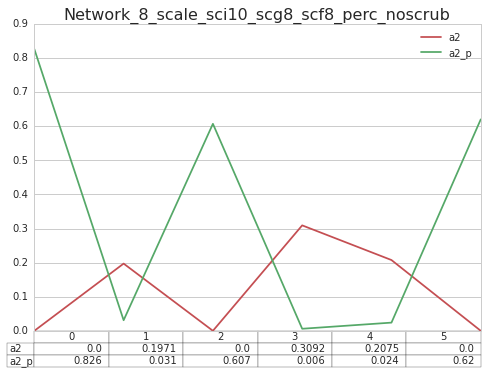

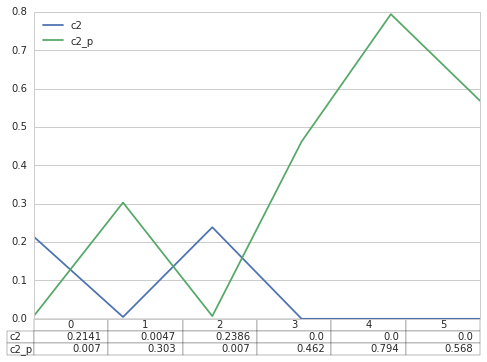

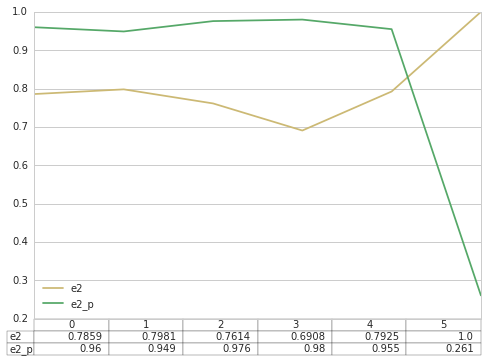

In [137]:
# plot heritability results
for num_net in network_select:
    plot_sub_partition(anat_template,partition_vol,[num_net])
    heritab_filename = '%sclust_%s_%s_%s_%s.csv'%(path_fir,num_net,scale,fir_norm,scrub)
    herit_tab = pd.read_csv(heritab_filename)
    #round heritability estimate 
    df_a =np.round(herit_tab[['a2','a2_p']],decimals=4)
    df_c =np.round(herit_tab[['c2','c2_p']],decimals=4)
    df_e =np.round(herit_tab[['e2','e2_p']],decimals=4)
    
    #plot a2
    fig, ax = plt.subplots(1,1)
    ax.set_title('Network_%s_scale_%s_%s_%s'%(num_net,scale,fir_norm,scrub),fontsize=16)
    ax.get_xaxis().set_visible(False)   # hide Ticks
    df_a.plot(table=True, ax=ax,color=['r', 'g'])
    #plot c2
    fig, ax = plt.subplots(1, 1)
    ax.get_xaxis().set_visible(False)   # hide Ticks
    df_c.plot(table=True, ax=ax,color=['b', 'g'])
    #plot e2
    fig, ax = plt.subplots(1, 1)
    ax.get_xaxis().set_visible(False)   # hide Ticks
    df_e.plot(table=True, ax=ax,color=['y', 'g'])